# **Case Study - Customer churn Prediction**

--------------------

## **Context**

--------------------
Customer churn prediction project based on Telecom batabase from Kaggle

--------------------

## **Objectives**

* Identify the different factors that drive customer churn
* Build a model to predict if a customer will churn or not

--------------------

## **Tests to be made along the project to find the best model:**
1. Dropping different features that might seem irrelevant to our problem (e.g., TotalCharges, Gender, PhoneService)
2. Using different encoders (i.e., OrdinalEncoder or OneHorEncoder for 'Contract')
3. Trying different scalers (i.e., MinMaxScaler, StandardScaler)
4. Try to use balancing techniques (e.g., oversampling)

## **Importing the libraries and overviewing the dataset**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scalers and encoders
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate, cross_val_score

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Loading the dataset**

In [2]:
# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

# Loading the dataset
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

### **Checking the info contained in the dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### **Notes**:

1. There are 7043 observations of customers, with 21 columns (1 ID, 19 Features, 1 Target)
2. There are no missing values in any of the columns

#### **Checking unique values in each column**

In [6]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
# print the unique values from each column of 'data'
for col in df.columns:
    print(col, df[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

#### **Notes**:
1. CustomerID is useless for our analysis, so we should drop it
2. We will have to convert 'TotalCharges' into a numerical value

In [8]:
# Dropping the 'customerID' column
df=df.drop(['customerID'], axis=1)

In [9]:
# convert the 'TotalCharges' column to a numeric data type.
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### **Notes**:
1. There are some missing values in the TotalCharges columns, which can be approximated by multiplying 'tenure' and 'MonthlyCharges'

In [11]:
# Inputing missing values
mask = df['TotalCharges'].isna()
df.loc[mask, 'TotalCharges'] = df[mask].apply(lambda row: row['tenure'] * row['MonthlyCharges'], axis=1)

In [12]:
df.loc[mask, ['TotalCharges', 'tenure', 'MonthlyCharges']]

TotalCharges  tenure  MonthlyCharges
488            0.0       0           52.55
753            0.0       0           20.25
936            0.0       0           80.85
1082           0.0       0           25.75
1340           0.0       0           56.05
3331           0.0       0           19.85
3826           0.0       0           25.35
4380           0.0       0           20.00
5218           0.0       0           19.70
6670           0.0       0           73.35
6754           0.0       0           61.90

#### **Notes**:
1. Some new customers have missing information on 'tenure' and 'TotalCharges'. We can infer they are customers with less than one month of tenure
2. Let's proceed like this, and we can later assess if it require to be replaced/dropped

### **Selecting numerical and categorical columns**

In [13]:
# Selecting categorical and numerical features
cat_features = ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

## **Exploratory Data Analysis and Data Preproessing**

### **Univariate analysis of numerical features**

In [14]:
# Checking summary statistics
df[num_features].describe().T

count         mean          std    min     25%      50%  \
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.00   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.35   
TotalCharges    7043.0  2279.734304  2266.794470   0.00  398.55  1394.55   

                    75%      max  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    3786.60  8684.80

#### **Exploring these variables in more depth by observing their distributions...**

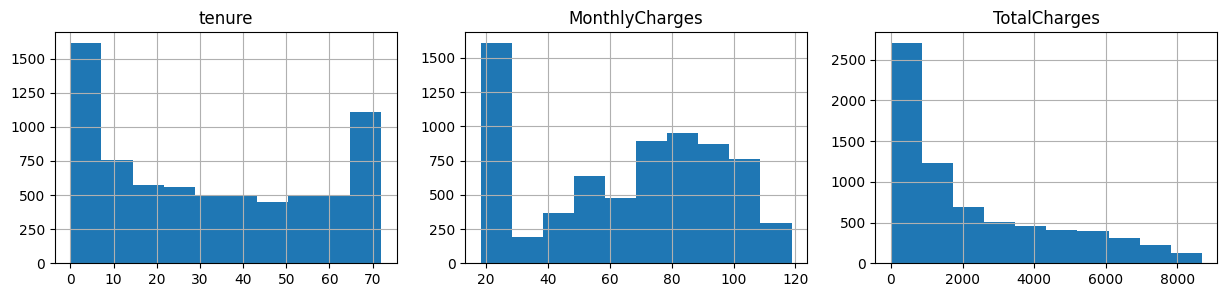

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
df[num_features[0]].hist(ax=ax[0])
ax[0].set_title(num_features[0])
df[num_features[1]].hist(ax=ax[1])
ax[1].set_title(num_features[1])
df[num_features[2]].hist(ax=ax[2])
ax[2].set_title(num_features[2])
plt.show()

#### **...And checking for outliers**

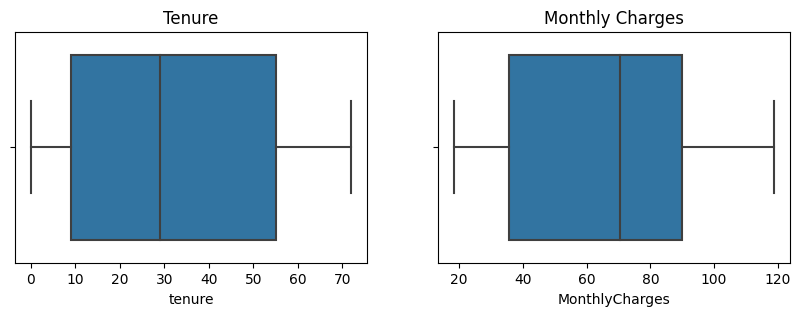

In [16]:
# identify ouutliers in the tenure and MonthlyCharges columns
fig, axs = plt.subplots(1, 2, figsize=(10,3))
sns.boxplot(x='tenure', data=df, ax=axs[0])
axs[0].set_title('Tenure')
sns.boxplot(x='MonthlyCharges', data=df, ax=axs[1])
axs[1].set_title('Monthly Charges')
plt.show()

#### **Notes:**
1. Tenure follows an expected pattern, with the bulk of customers in the middle layers, and outliers in both extremes
2. Monthly charges have a slightly skewed to the left normal shape
3. Total charges is right skewed, as expected, due to tenure and churn behavior (older customers have larger total charges, but are fewer as they are more likely to churn)
4. There are no outliers in both 'tenure' and 'monthly charges'

### **Univariate analysis of categorical features**

In [17]:
# Printing the % sub categories of each category
for feat in cat_features:
    print(df[feat].value_counts(normalize=True))
    print('*'*40)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64
****************************************
Male      0.504756
Female    0.495244
Name: gender, dtype: float64
****************************************
0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64
****************************************
No     0.516967
Yes    0.483033
Name: Partner, dtype: float64
****************************************
No     0.700412
Yes    0.299588
Name: Dependents, dtype: float64
****************************************
Yes    0.903166
No     0.096834
Name: PhoneService, dtype: float64
****************************************
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: MultipleLines, dtype: float64
****************************************
Fiber optic    0.439585
DSL            0.343746
No             0.216669
Name: InternetService, dtype: float64
****************************************
No                     0.496663
Yes                    0

#### **Notes:**
1. 'Churn' target has ~26% of 'Yes' and ~74% of 'No', so despite being unbalanced, we still have >25% ratio, which should not affect the performance of our model

### **Bivariate and Multivariate analysis**
We have analyzed different categorical and numerical variables, now we will observe how churn rate relates to other categorical variables

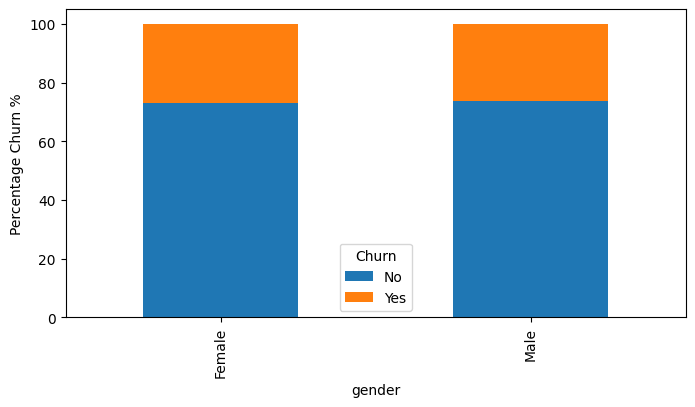

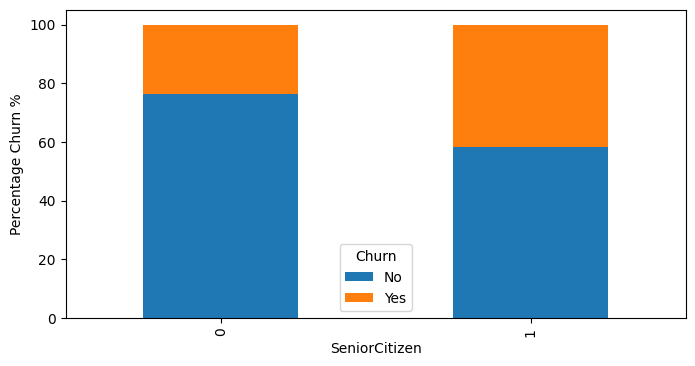

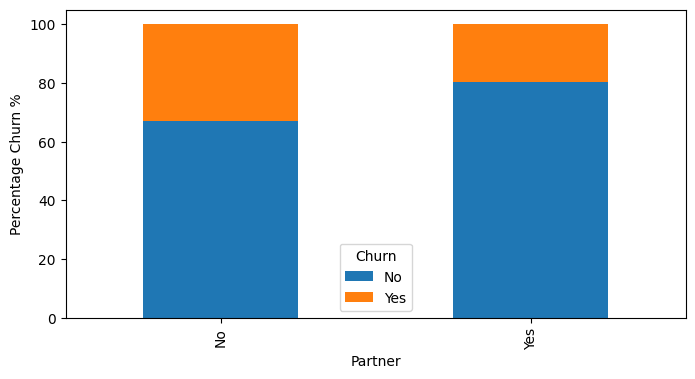

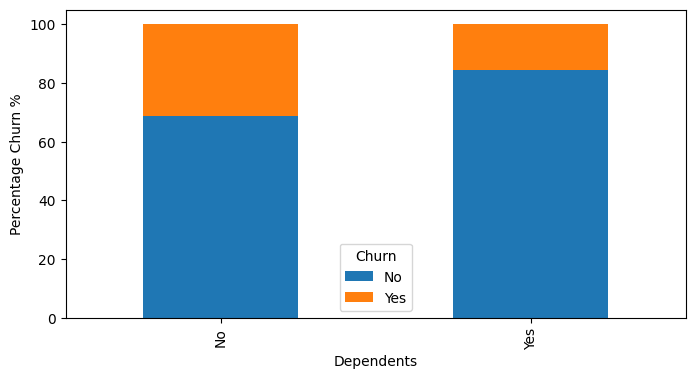

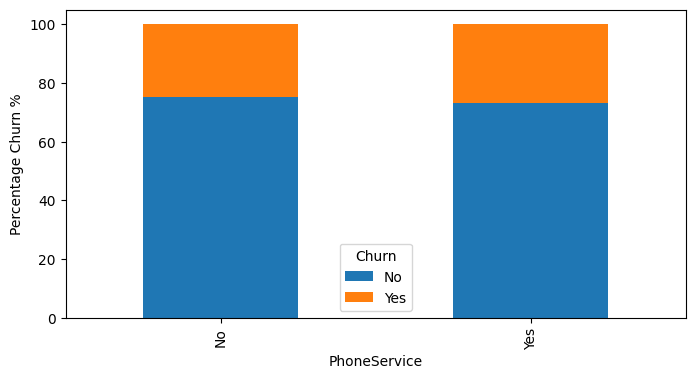

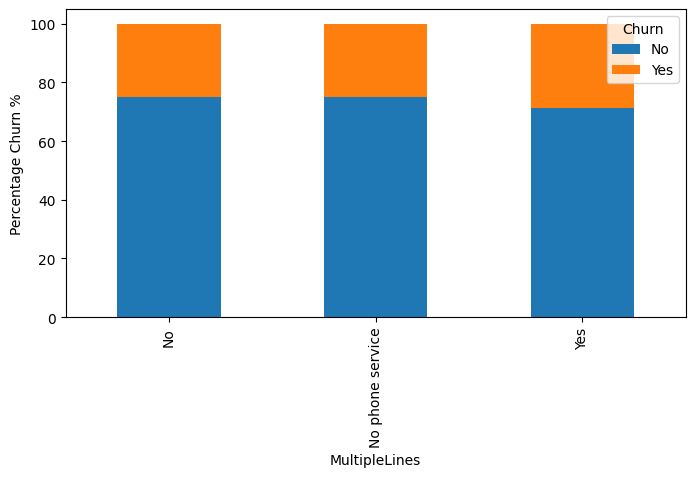

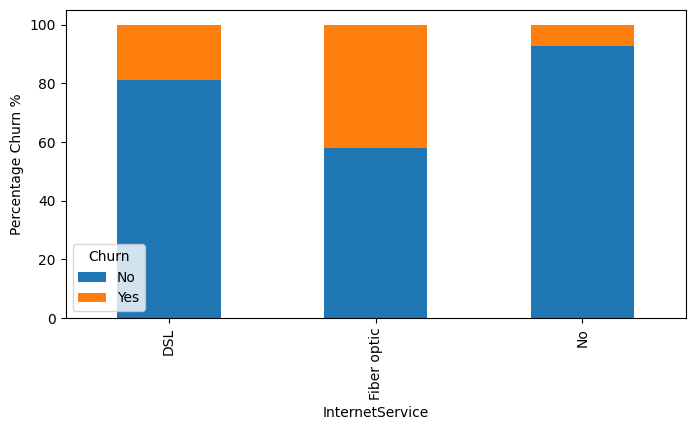

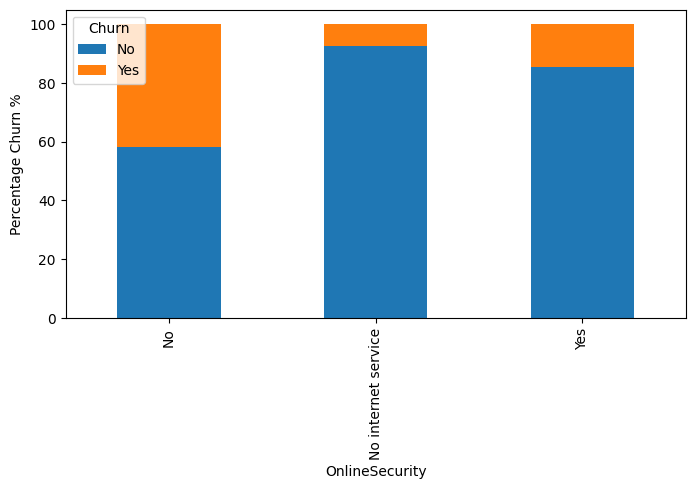

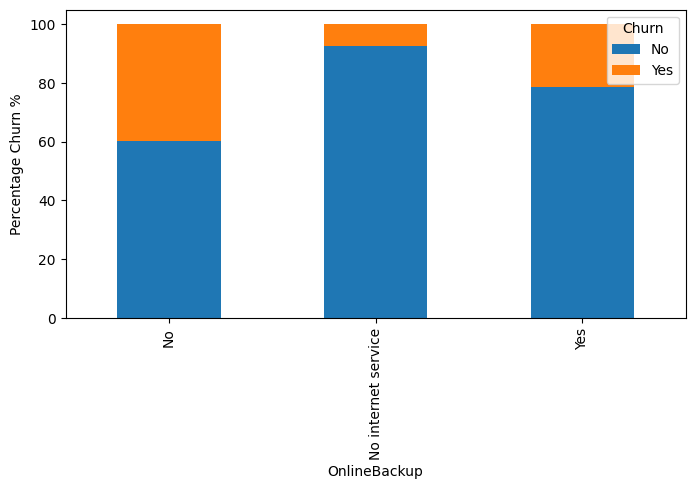

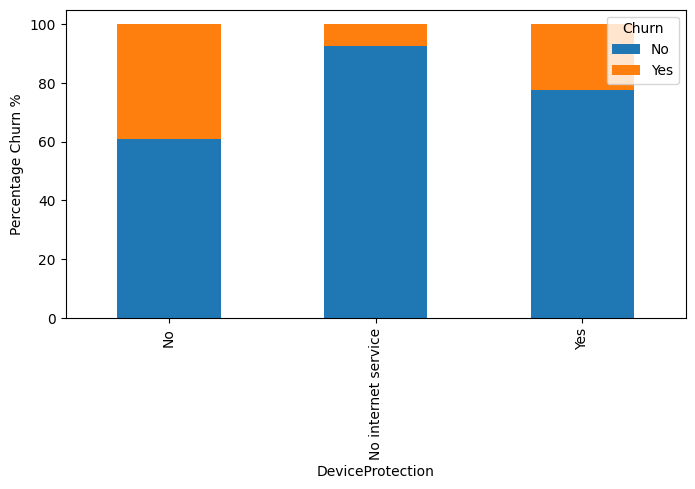

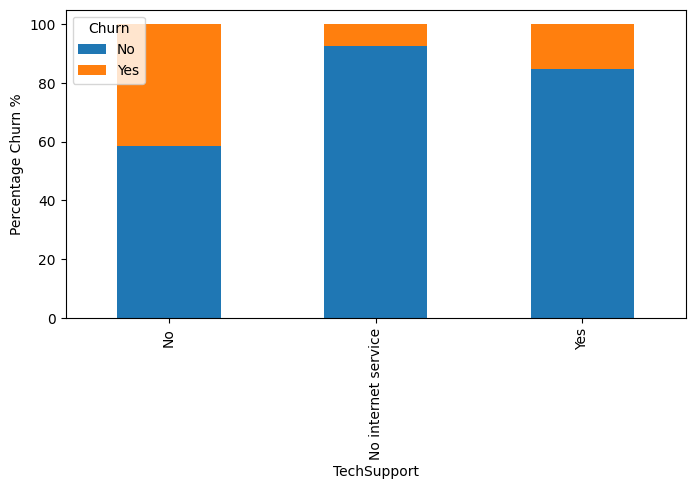

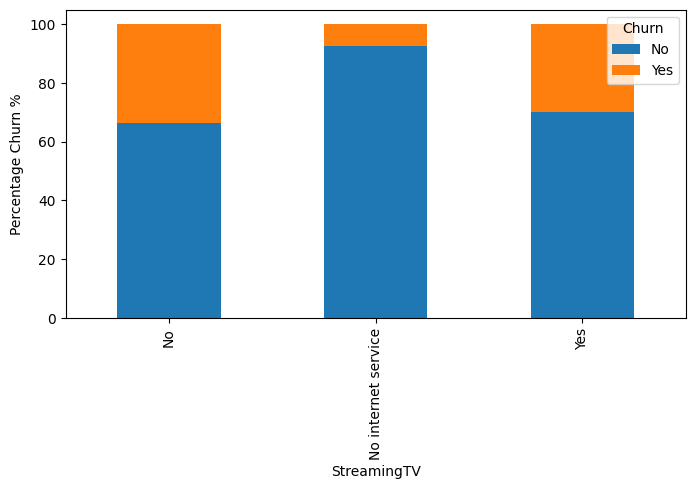

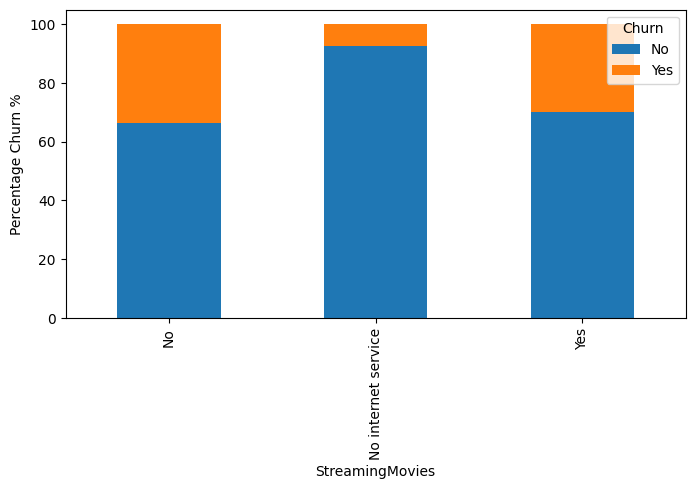

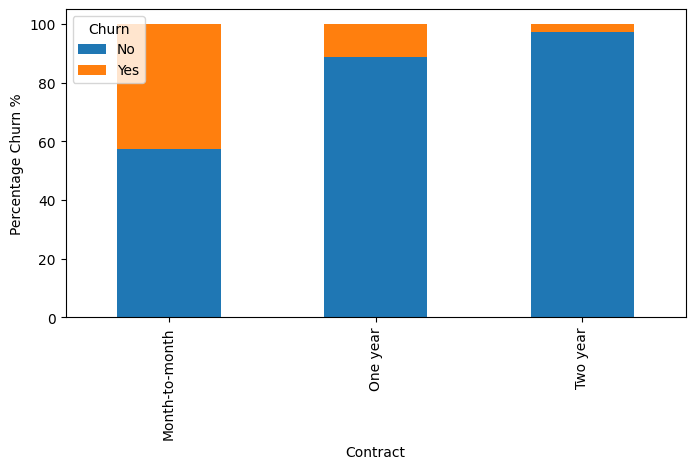

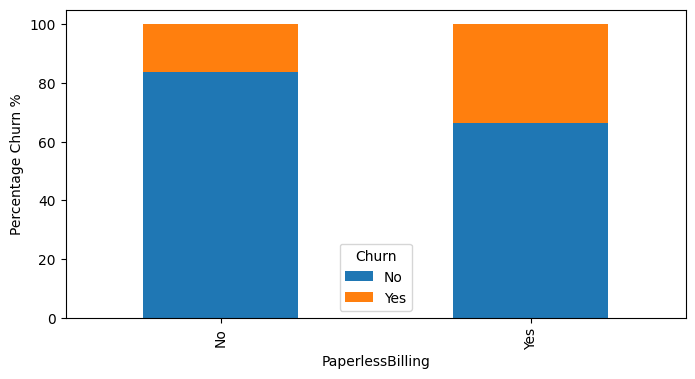

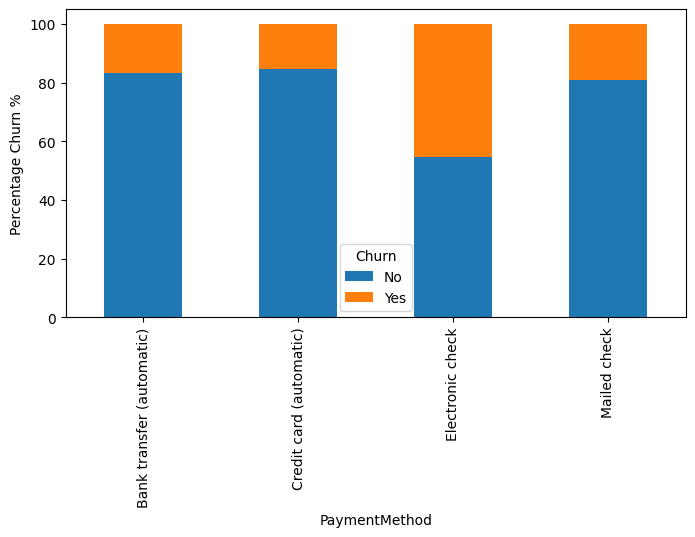

In [18]:
for feat in cat_features:
    if feat != 'Churn':
        (pd.crosstab(df[feat], df['Churn'], normalize='index')*100).plot(kind='bar', figsize=(8,4), stacked=True)
        plt.ylabel('Percentage Churn %')

#### **Now let's check the relationship between churn and the numerical features**

In [19]:
# Calculating the mean of numerical features grouped by churn rate
df.groupby(['Churn'])[num_features].mean()

tenure  MonthlyCharges  TotalCharges
Churn                                         
No     37.569965       61.265124   2549.911442
Yes    17.979133       74.441332   1531.796094

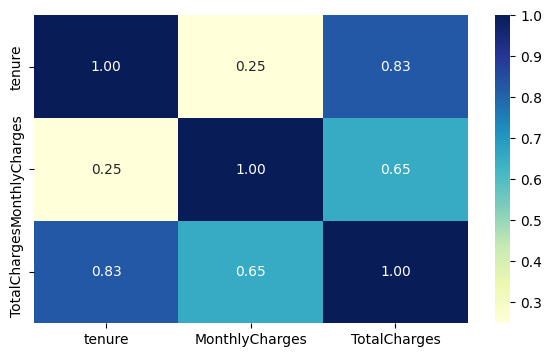

In [20]:
plt.figure(figsize=(7,4))
sns.heatmap(df[num_features].corr(),annot=True, fmt='0.2f', cmap='YlGnBu');

#### **Notes:**
1. 'TotalCharges' and 'Tenure' are highly correlated - we could drop 'TotalCharges', as this feature can be approximated by 'Tenure' times 'MonthlyCharges'

In [21]:
df = df.drop(['TotalCharges'], axis=1)

## **Model Building**
1. Splitting into training and testing sets
2. Data preparation
3. Building the model on the training set
4. Tuning the model
5. Testing on the testing set

### **Data Preparation**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


#### **Creating independent variables (X) and dependent variable/target (y)**

In [23]:
# Creating X and y datasets
X = df.drop(['Churn'], axis=1)
y = df.Churn

#### **Splitting into training and testing sets, using 30% sample for testing**

In [24]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### **Encoding the data**

In [25]:
# Defining features to be encoded by each encoder

# Categorical features
nom_features = list(X_train.drop(['Contract', 'tenure', 'MonthlyCharges'], axis=1).columns) # Nominal features
ord_features = ['Contract'] # Ordinal features

# Numerical features
num_features = ['tenure', 'MonthlyCharges']

In [26]:
# Instantiating encoders for target and features 

le_encoder = LabelEncoder() # For target
ohe_encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore') # For nominal features
oe_encoder = OrdinalEncoder() # For ordinal features

# Create an encoding pipeline with ColumnTransformer for the features
encoding_pipeline = ColumnTransformer([
    ('nominal_encoder', ohe_encoder, nom_features),
    ('ordinal_encoder', oe_encoder, ord_features)
], remainder='passthrough')

In [27]:
# Fiting and transforming the encoding for X and y train sets
y_train_encoded = le_encoder.fit_transform(y_train)
X_train_encoded = encoding_pipeline.fit_transform(X_train)

In [28]:
display(encoding_pipeline)

ColumnTransformer(remainder='passthrough',
                  transformers=[('nominal_encoder',
                                 OneHotEncoder(drop='if_binary',
                                               handle_unknown='ignore'),
                                 ['gender', 'SeniorCitizen', 'Partner',
                                  'Dependents', 'PhoneService', 'MultipleLines',
                                  'InternetService', 'OnlineSecurity',
                                  'OnlineBackup', 'DeviceProtection',
                                  'TechSupport', 'StreamingTV',
                                  'StreamingMovies', 'PaperlessBilling',
                                  'PaymentMethod']),
                                ('ordinal_encoder', OrdinalEncoder(),
                                 ['Contract'])])

Pseudo-coding:
1. Move encoded dataset to a pandas df with correct column names
2. Create a scaler for the encoded features, and fit it to the training set
3. Create a pipeline with all preprocessing steps
4. Apply it to the testing set

In [29]:
# Get the feature names from the column transformer
feature_names = list(encoding_pipeline.named_transformers_['nominal_encoder'].get_feature_names_out(input_features = nom_features))

# Include the names of the features that were not encoded by the column transformer
feature_names = feature_names + ord_features + num_features

# Moving the encoded features to a df
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=feature_names)

In [30]:
X_train_encoded_df.head()

gender_Male  SeniorCitizen_1  Partner_Yes  Dependents_Yes  \
0          1.0              0.0          1.0             1.0   
1          1.0              0.0          0.0             0.0   
2          1.0              0.0          0.0             0.0   
3          0.0              1.0          1.0             1.0   
4          0.0              1.0          0.0             0.0   

   PhoneService_Yes  MultipleLines_No  MultipleLines_No phone service  \
0               1.0               0.0                             0.0   
1               1.0               1.0                             0.0   
2               1.0               1.0                             0.0   
3               1.0               1.0                             0.0   
4               1.0               1.0                             0.0   

   MultipleLines_Yes  InternetService_DSL  InternetService_Fiber optic  \
0                1.0                  1.0                          0.0   
1                0.0                  0.0                          1.0   
2                0.0                  0.0                          0.0   
3                0.0                  0.0                          1.0   
4                0.0                  0.0                          1.0   

   InternetService_No  OnlineSecurity_No  OnlineSecurity_No internet service  \
0                 0.0                1.0                                 0.0   
1                 0.0                1.0                                 0.0   
2                 1.0                0.0                                 1.0   
3                 0.0                1.0                                 0.0   
4                 0.0                0.0                                 0.0   

   OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_No internet service  \
0                 0.0              0.0                               0.0   
1                 0.0              1.0                               0.0   
2                 0.0              0.0                               1.0   
3                 0.0              1.0                               0.0   
4                 1.0              1.0                               0.0   

   OnlineBackup_Yes  DeviceProtection_No  \
0               1.0                  1.0   
1               0.0                  1.0   
2               0.0                  0.0   
3               0.0                  0.0   
4               0.0                  1.0   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                   0.0                   0.0             0.0   
1                                   0.0                   0.0             1.0   
2                                   1.0                   0.0             0.0   
3                                   0.0                   1.0             1.0   
4                                   0.0                   0.0             1.0   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                              0.0              1.0             0.0   
1                              0.0              0.0             0.0   
2                              1.0              0.0             0.0   
3                              0.0              0.0             0.0   
4                              0.0              0.0             1.0   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  \
0                              0.0              1.0                 1.0   
1                              0.0              1.0                 1.0   
2                              1.0              0.0                 0.0   
3                              0.0              1.0                 0.0   
4                              0.0              0.0                 1.0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                  0.0                  0.0   
1                                  0.0  

In [31]:
# Transforming the encoding for X and y test sets
y_test_encoded = le_encoder.transform(y_test)
X_test_encoded = encoding_pipeline.transform(X_test)

# Moving the encoded features to a df
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=feature_names)

In [32]:
X_test_encoded_df.head()

gender_Male  SeniorCitizen_1  Partner_Yes  Dependents_Yes  \
0          0.0              0.0          1.0             0.0   
1          1.0              0.0          0.0             0.0   
2          0.0              0.0          1.0             1.0   
3          0.0              0.0          0.0             0.0   
4          1.0              0.0          0.0             0.0   

   PhoneService_Yes  MultipleLines_No  MultipleLines_No phone service  \
0               0.0               0.0                             1.0   
1               1.0               0.0                             0.0   
2               1.0               1.0                             0.0   
3               1.0               1.0                             0.0   
4               1.0               1.0                             0.0   

   MultipleLines_Yes  InternetService_DSL  InternetService_Fiber optic  \
0                0.0                  1.0                          0.0   
1                1.0                  0.0                          0.0   
2                0.0                  0.0                          0.0   
3                0.0                  0.0                          1.0   
4                0.0                  1.0                          0.0   

   InternetService_No  OnlineSecurity_No  OnlineSecurity_No internet service  \
0                 0.0                1.0                                 0.0   
1                 1.0                0.0                                 1.0   
2                 1.0                0.0                                 1.0   
3                 0.0                1.0                                 0.0   
4                 0.0                1.0                                 0.0   

   OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_No internet service  \
0                 0.0              1.0                               0.0   
1                 0.0              0.0                               1.0   
2                 0.0              0.0                               1.0   
3                 0.0              1.0                               0.0   
4                 0.0              1.0                               0.0   

   OnlineBackup_Yes  DeviceProtection_No  \
0               0.0                  1.0   
1               0.0                  0.0   
2               0.0                  0.0   
3               0.0                  0.0   
4               0.0                  1.0   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                   0.0                   0.0             1.0   
1                                   1.0                   0.0             0.0   
2                                   1.0                   0.0             0.0   
3                                   0.0                   1.0             1.0   
4                                   0.0                   0.0             0.0   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                              0.0              0.0             1.0   
1                              1.0              0.0             0.0   
2                              1.0              0.0             0.0   
3                              0.0              0.0             1.0   
4                              0.0              1.0             1.0   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  \
0                              0.0              0.0                 1.0   
1                              1.0              0.0                 0.0   
2                              1.0              0.0                 0.0   
3                              0.0              0.0                 1.0   
4                              0.0              0.0                 1.0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                  0.0                  0.0   
1                                  1.0  

In [33]:
# Instantiating scaler using MinMaxScaler
scaler = MinMaxScaler()

# Fit_transform scale on the training dataset
X_train_encoded_scaled = scaler.fit_transform(X_train_encoded_df)
X_train_encoded_scaled = pd.DataFrame(X_train_encoded_scaled, columns=X_train_encoded_df.columns)

In [34]:
X_train_encoded_scaled.head()

gender_Male  SeniorCitizen_1  Partner_Yes  Dependents_Yes  \
0          1.0              0.0          1.0             1.0   
1          1.0              0.0          0.0             0.0   
2          1.0              0.0          0.0             0.0   
3          0.0              1.0          1.0             1.0   
4          0.0              1.0          0.0             0.0   

   PhoneService_Yes  MultipleLines_No  MultipleLines_No phone service  \
0               1.0               0.0                             0.0   
1               1.0               1.0                             0.0   
2               1.0               1.0                             0.0   
3               1.0               1.0                             0.0   
4               1.0               1.0                             0.0   

   MultipleLines_Yes  InternetService_DSL  InternetService_Fiber optic  \
0                1.0                  1.0                          0.0   
1                0.0                  0.0                          1.0   
2                0.0                  0.0                          0.0   
3                0.0                  0.0                          1.0   
4                0.0                  0.0                          1.0   

   InternetService_No  OnlineSecurity_No  OnlineSecurity_No internet service  \
0                 0.0                1.0                                 0.0   
1                 0.0                1.0                                 0.0   
2                 1.0                0.0                                 1.0   
3                 0.0                1.0                                 0.0   
4                 0.0                0.0                                 0.0   

   OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_No internet service  \
0                 0.0              0.0                               0.0   
1                 0.0              1.0                               0.0   
2                 0.0              0.0                               1.0   
3                 0.0              1.0                               0.0   
4                 1.0              1.0                               0.0   

   OnlineBackup_Yes  DeviceProtection_No  \
0               1.0                  1.0   
1               0.0                  1.0   
2               0.0                  0.0   
3               0.0                  0.0   
4               0.0                  1.0   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                   0.0                   0.0             0.0   
1                                   0.0                   0.0             1.0   
2                                   1.0                   0.0             0.0   
3                                   0.0                   1.0             1.0   
4                                   0.0                   0.0             1.0   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                              0.0              1.0             0.0   
1                              0.0              0.0             0.0   
2                              1.0              0.0             0.0   
3                              0.0              0.0             0.0   
4                              0.0              0.0             1.0   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  \
0                              0.0              1.0                 1.0   
1                              0.0              1.0                 1.0   
2                              1.0              0.0                 0.0   
3                              0.0              1.0                 0.0   
4                              0.0              0.0                 1.0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                  0.0                  0.0   
1                                  0.0  

In [35]:
# Scale the testing dataset
X_test_encoded_scaled = scaler.transform(X_test_encoded_df)
X_test_encoded_scaled = pd.DataFrame(X_test_encoded_scaled, columns=X_test_encoded_df.columns)

In [36]:
X_test_encoded_scaled.head()

gender_Male  SeniorCitizen_1  Partner_Yes  Dependents_Yes  \
0          0.0              0.0          1.0             0.0   
1          1.0              0.0          0.0             0.0   
2          0.0              0.0          1.0             1.0   
3          0.0              0.0          0.0             0.0   
4          1.0              0.0          0.0             0.0   

   PhoneService_Yes  MultipleLines_No  MultipleLines_No phone service  \
0               0.0               0.0                             1.0   
1               1.0               0.0                             0.0   
2               1.0               1.0                             0.0   
3               1.0               1.0                             0.0   
4               1.0               1.0                             0.0   

   MultipleLines_Yes  InternetService_DSL  InternetService_Fiber optic  \
0                0.0                  1.0                          0.0   
1                1.0                  0.0                          0.0   
2                0.0                  0.0                          0.0   
3                0.0                  0.0                          1.0   
4                0.0                  1.0                          0.0   

   InternetService_No  OnlineSecurity_No  OnlineSecurity_No internet service  \
0                 0.0                1.0                                 0.0   
1                 1.0                0.0                                 1.0   
2                 1.0                0.0                                 1.0   
3                 0.0                1.0                                 0.0   
4                 0.0                1.0                                 0.0   

   OnlineSecurity_Yes  OnlineBackup_No  OnlineBackup_No internet service  \
0                 0.0              1.0                               0.0   
1                 0.0              0.0                               1.0   
2                 0.0              0.0                               1.0   
3                 0.0              1.0                               0.0   
4                 0.0              1.0                               0.0   

   OnlineBackup_Yes  DeviceProtection_No  \
0               0.0                  1.0   
1               0.0                  0.0   
2               0.0                  0.0   
3               0.0                  0.0   
4               0.0                  1.0   

   DeviceProtection_No internet service  DeviceProtection_Yes  TechSupport_No  \
0                                   0.0                   0.0             1.0   
1                                   1.0                   0.0             0.0   
2                                   1.0                   0.0             0.0   
3                                   0.0                   1.0             1.0   
4                                   0.0                   0.0             0.0   

   TechSupport_No internet service  TechSupport_Yes  StreamingTV_No  \
0                              0.0              0.0             1.0   
1                              1.0              0.0             0.0   
2                              1.0              0.0             0.0   
3                              0.0              0.0             1.0   
4                              0.0              1.0             1.0   

   StreamingTV_No internet service  StreamingTV_Yes  StreamingMovies_No  \
0                              0.0              0.0                 1.0   
1                              1.0              0.0                 0.0   
2                              1.0              0.0                 0.0   
3                              0.0              0.0                 1.0   
4                              0.0              0.0                 1.0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                  0.0                  0.0   
1                                  1.0  

In [37]:
# Moving the encoded test and train target to a df
y_train_encoded = pd.DataFrame(y_train_encoded, columns=['Churn'])
y_test_encoded = pd.DataFrame(y_test_encoded, columns=['Churn'])

In [38]:
# Create a pipeline with all preprocessing steps
# final_pipeline = Pipeline([
#                     ('encoding', encoding_pipeline),
#                     ('to_dataframe', FunctionTransformer(lambda x: pd.DataFrame(x, columns = ohe_encoder.get_feature_names_out() + ord_features + num_features)))
#                     ])


# columns = ohe_encoder.get_feature_names_out().tolist() + ord_features + num_features
# X_train_encoded = pd.DataFrame(X_train_encoded, columns=columns)

### **Instantiating the Models**

#### **Instantiate the LogisticRegression model**
1. We will use Logistic Regression instead of Linear Regression as we do not want to predict a continuous variable, but the probability of a categorical one

In [47]:
# Instantiate the LogisticRegression model
log_reg_model = LogisticRegression()

# Cross-validate the model
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

cv_log_reg_scores = cross_validate(log_reg_model, X_train_encoded_scaled, y_train_encoded, scoring=scoring_metrics, cv=10)

for metric in scoring_metrics:
    print(f"Mean {metric} score: {cv_log_reg_scores['test_'+metric].mean()}")

Mean accuracy score: 0.8006085192697767
Mean precision score: 0.6500963708323197
Mean recall score: 0.5259332140727488
Mean f1 score: 0.5805000638091455


In [48]:
# Define the hyperparameter grid to search over the LogisticRegression model
param_grid = {'penalty': ['l1', 'l2'],
              'C': [0.01, 0.1, 1, 10, 100]}

# Define the GridSearchCV object
grid_search = GridSearchCV(log_reg_model, param_grid=param_grid, scoring='f1', cv=10)

# Fit the GridSearchCV object in the training set
grid_search.fit(X_train_encoded_scaled, y_train_encoded)

# Print the best hyperparameters and the corresponding validation score
print("Best hyperparameters: ", grid_search.best_params_)
print("Validation score: ", grid_search.best_score_)

Best hyperparameters:  {'C': 10, 'penalty': 'l2'}
Validation score:  0.5825638251764484


#### **Instantiate the RandomForestClassifier model**

In [50]:
# Instantiate the RandomForestClassifier model
rand_for_model = RandomForestClassifier()

# Cross-validate the model
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

cv_rand_for_scores = cross_validate(rand_for_model, X_train_encoded_scaled, y_train_encoded, scoring=scoring_metrics, cv=10)

for metric in scoring_metrics:
    print(f"Mean {metric} score: {cv_log_reg_scores['test_'+metric].mean()}")

Mean accuracy score: 0.8006085192697767
Mean precision score: 0.6500963708323197
Mean recall score: 0.5259332140727488
Mean f1 score: 0.5805000638091455


In [ ]:
# Define the hyperparameter grid to search over the LogisticRegression model
param_grid = {'n_estimators': ['l1', 'l2'],
              'C': [0.01, 0.1, 1, 10, 100]}